In [1]:
import numpy as np
from scipy.constants import  mu_0, h
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit
from uncertainties import ufloat 
import uncertainties.unumpy as unp

In [2]:
x_res = np.array([4.6,7.0,4.35,6.2,9.7,6.,2.7,12.1])
x_end = np.array([12,11.6,11.8,11.9,12.0,11.9,14.8,16.3])
I_begin =  np.array([-584.,94,-475,2,96,-761,-759,134])*1e-3
I_end = np.array([-152,524,-47,420,527,-335,-225,718])*1e-3

In [49]:
#Resonanzstrom berechnen
I_res = pd.Series(I_begin + (I_end-I_begin)/(x_end)*x_res, name= r"$I_\mathrm{res}$ in \si{\milli\ampere}")

In [50]:
B_res = pd.Series(8/ np.sqrt(125) * mu_0*156./0.1*I_res, name=r"$B_\mathrm{res}$ in \si{\milli\ampere}")

In [51]:
f = pd.Series([15.92,10.552,20.522,25], name = r"$f_\mathrm{res}$ in \si{\mega\hertz}")*1e6

In [6]:
para = B_res > 0
anti = B_res < 0

30046692078.4


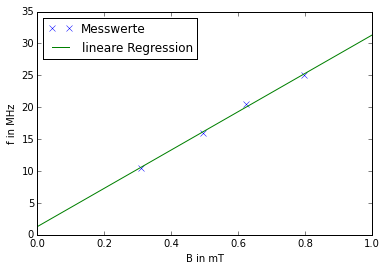

[[  1.44656337e+18  -8.04127289e+14]
 [ -8.04127289e+14   4.92987475e+11]]
29341774104.2


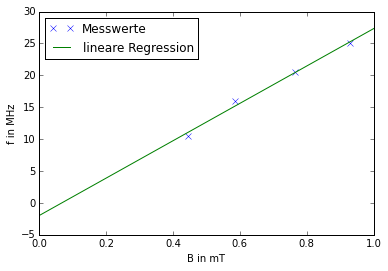

[[  3.00277960e+18  -2.04643375e+15]
 [ -2.04643375e+15   1.49438911e+12]]


In [11]:
name = ["para.pdf", "anti.pdf"]
m_list = []
b_list = []
def linear(x,m,b):
    return m*x+b

for alig in [para,anti]:
    plt.close()
    plt.plot( abs(B_res[alig])*1e3,f*1e-6, 'x', label="Messwerte")
    
    (m,b), cov =  curve_fit(linear, abs(B_res[alig]),f,(3e7,0))
    print(m)
    x = np.linspace(0,.001)
    plt.plot(x*1e3,(m*x+b)*1e-6, label="lineare Regression")
    plt.xlabel("B in mT")
    plt.ylabel("f in MHz")
    plt.legend(loc=2)
    m_list.append(ufloat(m,cov[0][0]**0.5))
    b_list.append(ufloat(b,cov[1][1]**0.5))
    plt.savefig(name.pop())
    plt.show()
    print(cov)
    
m = np.array(m_list)
b = np.array(b_list)

In [43]:
# Landé Faktor berechnen
g = m*h/9.27e-24
b_erde = abs(b*h/(9.27e-24*g))

In [63]:
form2(2.3472)

'2.35'

In [75]:
#Daten tabelle erstellen
def form2(x):
    return "%.2f"%x
def form4(x):
    return str(round(x,3))
name = ["para.tex", "anti.tex"]
for alig in [para,anti]:
    out = open(name.pop(),"w+")
    df = pd.DataFrame([f*1e-6,abs(I_res[alig].reset_index(drop=True))*1e3, abs(B_res[alig].reset_index(drop=True)*1e3)]).T
    print(df)
    df.to_latex(out,index=False, formatters=[form2,lambda x: str(int(round(x))),form4], escape=False)
    out.close()

   $f_\mathrm{res}$ in \si{\mega\hertz}  \
0                                15.920   
1                                10.552   
2                                20.522   
3                                25.000   

   $I_\mathrm{res}$ in \si{\milli\ampere}  \
0                              353.482759   
1                              219.781513   
2                              444.391667   
3                              567.521472   

   $B_\mathrm{res}$ in \si{\milli\ampere}  
0                                0.495836  
1                                0.308291  
2                                0.623355  
3                                0.796071  
   $f_\mathrm{res}$ in \si{\mega\hertz}  \
0                                15.920   
1                                10.552   
2                                20.522   
3                                25.000   

   $I_\mathrm{res}$ in \si{\milli\ampere}  \
0                              418.400000   
1                              3

In [65]:
#Result table

df = pd.DataFrame([m,b*1e-6,g, b_erde*1e3], index=[r"$m$ in \si{\hertz\per\tesla}", r"b in \si{\mega\hertz}", "g", r"$B_\mathrm{Erde}$ in \si{\milli\tesla}"] ,
                  columns=["parallel","anti-parallel"]).T


In [47]:
out = open("results.tex","w")
out.write(df.to_latex(escape=False, formatters=4*["${:L}$".format]).replace("lllll","lcccc"))
out.close()

In [78]:
str(g.mean())

'2.12+/-0.08'

In [79]:
str(b_erde.mean())

'(5.6+/-2.4)e-05'

In [35]:
df.to_latex?